### Analysis of Bank-Marketing Dataset

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#loading the dataset
df = pd.read_csv(r"C:\Users\Vrdella\Downloads\bank+marketing\bank\bank.csv",sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [75]:
# printing last 5 rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [76]:
# print the shape
df.shape

(4521, 17)

In [77]:
# columns of dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [80]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [81]:
# finding missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

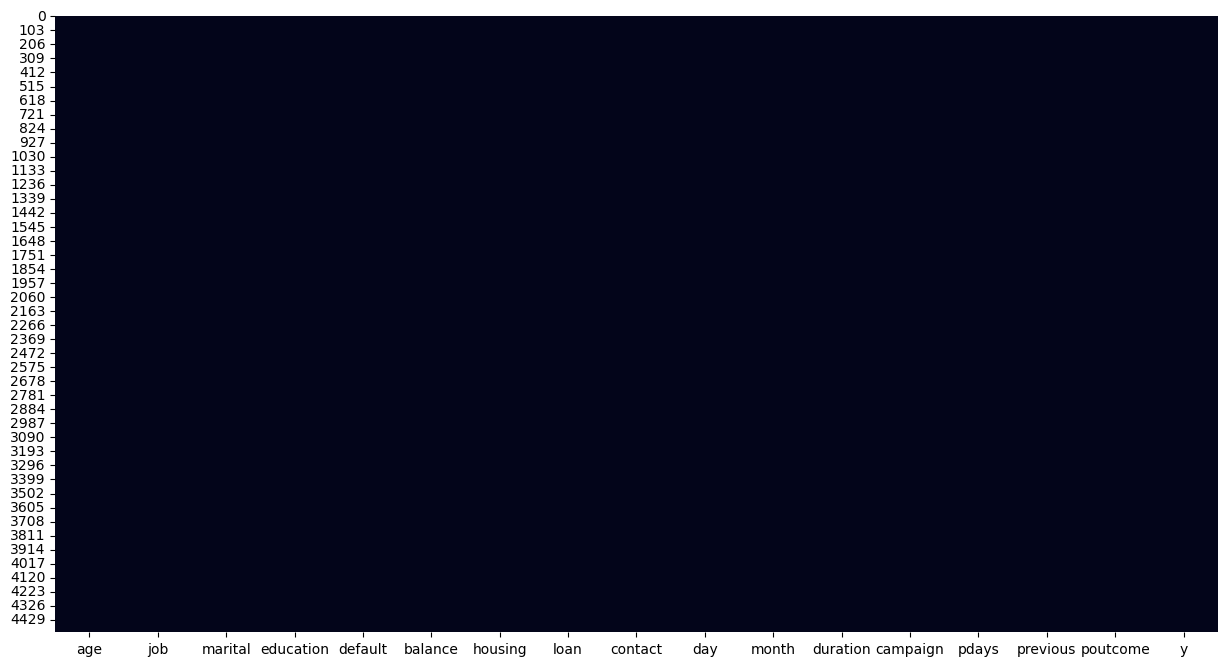

In [82]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

C:\Users\Vrdella\AppData\Local\Temp\ipykernel_47192\1160258699.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


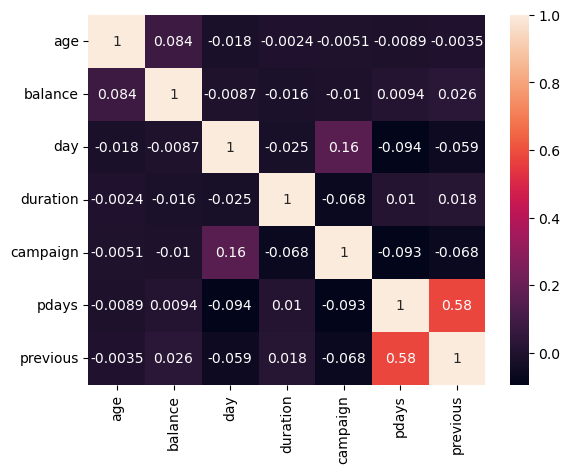

In [83]:
cor = df.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [84]:
df_categoric_features = df.select_dtypes(include='object').drop(['y'],axis=1)

In [85]:
for i in df_categoric_features:
    print(i.upper())
    print(df[i].value_counts())
    print( )

JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

MARITAL
married     2797
single      1196
divorced     528
Name: marital, dtype: int64

EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

DEFAULT
no     4445
yes      76
Name: default, dtype: int64

HOUSING
yes    2559
no     1962
Name: housing, dtype: int64

LOAN
no     3830
yes     691
Name: loan, dtype: int64

CONTACT
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

MONTH
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

POUTCOME
unknown    3705
failure     490
other       197
success     129


### Removing outliers from dataset

In [86]:
def outliers_indices(feature):
    mid = df[feature].mean()
    sigma = df[feature].std()
    return df[(df[feature] < mid - 3*sigma) | (df[feature] > mid + 3*sigma)].index

In [87]:
wrong_dur=outliers_indices('duration')
wrong_bal=outliers_indices('balance')
out=set(wrong_bal|wrong_dur)
len(out)

C:\Users\Vrdella\AppData\Local\Temp\ipykernel_47192\15136603.py:3: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  out=set(wrong_bal|wrong_dur)


176

In [88]:
df.drop(out,inplace=True)

In [89]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [90]:
df['y']=df['y'].map({'no': 0,'yes': 1})
df['duration']=df['duration']/60
df['default']=df['default'].map({'no':0,'yes':1})
df['housing']=df['housing'].map({'no':0,'yes':1})
df['loan']=df['loan'].map({'no':0,'yes':1})

In [91]:
# dummy df
df = pd.get_dummies(df, columns=['job', 'education', 'marital', 'contact', 'poutcome', 'month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4345 entries, 0 to 4520
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4345 non-null   int64  
 1   default              4345 non-null   int64  
 2   balance              4345 non-null   int64  
 3   housing              4345 non-null   int64  
 4   loan                 4345 non-null   int64  
 5   day                  4345 non-null   int64  
 6   duration             4345 non-null   float64
 7   campaign             4345 non-null   int64  
 8   pdays                4345 non-null   int64  
 9   previous             4345 non-null   int64  
 10  y                    4345 non-null   int64  
 11  job_admin.           4345 non-null   uint8  
 12  job_blue-collar      4345 non-null   uint8  
 13  job_entrepreneur     4345 non-null   uint8  
 14  job_housemaid        4345 non-null   uint8  
 15  job_management       4345 non-null   u

In [92]:
df.head().T

,0,1,2,3,4
age,30.000000,33.000000,35.000000,30.000000,59.000000
default,0.000000,0.000000,0.000000,0.000000,0.000000
balance,1787.000000,4789.000000,1350.000000,1476.000000,0.000000
housing,0.000000,1.000000,1.000000,1.000000,1.000000
loan,0.000000,1.000000,0.000000,1.000000,0.000000
day,19.000000,11.000000,16.000000,3.000000,5.000000
duration,1.316667,3.666667,3.083333,3.316667,3.766667
campaign,1.000000,1.000000,1.000000,4.000000,1.000000
pdays,-1.000000,339.000000,330.000000,-1.000000,-1.000000
previous,0.000000,4.000000,1.000000,0.000000,0.000000


In [93]:
# create a decision classifier model

from sklearn.model_selection import train_test_split
X=df.drop('y',axis=1)
y=df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [98]:
from sklearn.metrics import accuracy_score

y_pred = tree.predict(X_test)
print("The Accuracy Score is ",accuracy_score(y_test, y_pred))

The Accuracy Score is  0.8780207134637514
